In [1]:
import matplotlib.pyplot as plt
import fidimag
import fidimag.common.constant as C
import numpy as np
%matplotlib inline
plt.style.use('../lato_style.mplstyle')

In [2]:
# System parameters
L = 100

# Some atomistic parameters
J = 5.88 * C.meV
D = 1.56 * C.meV
Ku = 0.41 * C.meV
mus = 3 * C.mu_B

# Lattice constants (in nm)
a = 0.2715
az = 0.408

# Magnetic field in Tesla
B = 2

# Free electron gyrom ratio
gamma = 1.76e11


In [3]:
import imp
imp.reload(fidimag)

<module 'fidimag' from '/home/david/git/fidimag/fidimag/__init__.py'>

In [4]:
nx, ny, nz = 100, 1, 1
dx, dy, dz = a, a, az

mesh = fidimag.common.CuboidMesh(nx=nx, ny=ny, nz=nz, dx=dx, dy=dy, dz=dz, 
                                periodicity=(False, False, False),
                                unit_length=1e-9)


In [5]:
sim = fidimag.atomistic.Sim(mesh, name='one_dim', driver='steepest_descent')
       
# Define the magnetisation
sim.set_mu_s(mus)

# Add the magnetic interactions
sim.add(fidimag.atomistic.Exchange(J))
sim.add(fidimag.atomistic.Anisotropy(Ku, axis=(0, 0, 1)))
sim.add(fidimag.atomistic.DMI(D, dmi_type='interfacial'))
sim.add(fidimag.atomistic.Zeeman((0, 0, B)))

xs = mesh.coordinates[:, 0]
centre_x = (xs.max() + xs.min()) * 0.5 + xs.min() 
       
def m_initial(r):
    x, y, z = r[0], r[1], r[2]
    if np.abs(x - centre_x) < 2:
        return (0, 0.1, -.9)
    else:
        return (0, 0.1, .9)

# sim.set_m((0.1, 0, 0.9))
sim.set_m(m_initial)

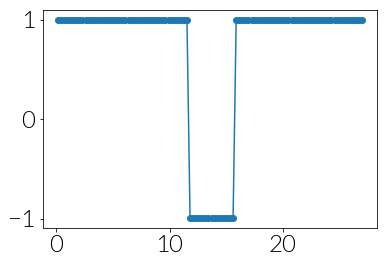

In [6]:
plt.plot(sim.mesh.coordinates[:, 0], sim.spin.reshape(-1, 3)[:, 2], 'o-')

In [7]:
sim.driver.minimize(max_count=5000, stopping_dm=1e-10)

#max_tau=0.382    max_dm=0.00192    counter=0
#max_tau=0.371    max_dm=0.704      counter=1
#max_tau=0.367    max_dm=0.127      counter=2
#max_tau=0.367    max_dm=0.205      counter=3
#max_tau=0.367    max_dm=0.129      counter=4
#max_tau=0.367    max_dm=0.187      counter=5
#max_tau=0.149    max_dm=0.236      counter=6
#max_tau=0.049    max_dm=0.166      counter=7
#max_tau=0.0379   max_dm=0.393      counter=8
#max_tau=0.0304   max_dm=0.642      counter=9
#max_tau=0.0523   max_dm=0.211      counter=10
#max_tau=0.0988   max_dm=0.176      counter=11
#max_tau=0.0475   max_dm=0.371      counter=12
#max_tau=0.0228   max_dm=0.337      counter=13
#max_tau=0.056    max_dm=0.482      counter=14
#max_tau=0.0242   max_dm=0.269      counter=15
#max_tau=0.158    max_dm=0.348      counter=16
#max_tau=0.0366   max_dm=1.46       counter=17
#max_tau=0.0991   max_dm=1.05       counter=18
#max_tau=0.0203   max_dm=0.549      counter=19
#max_tau=0.295    max_dm=0.209      counter=20
#max_tau=0.0243   max_d

#max_tau=0.0417   max_dm=0.000205   counter=549
#max_tau=0.494    max_dm=0.000226   counter=550
#max_tau=0.125    max_dm=0.000268   counter=551
#max_tau=0.0483   max_dm=0.00254    counter=552
#max_tau=0.0526   max_dm=0.00226    counter=553
#max_tau=0.0367   max_dm=0.00024    counter=554
#max_tau=0.114    max_dm=0.000228   counter=555
#max_tau=0.0621   max_dm=0.000785   counter=556
#max_tau=0.0936   max_dm=0.000448   counter=557
#max_tau=0.89     max_dm=0.000589   counter=558
#max_tau=0.632    max_dm=0.00502    counter=559
#max_tau=0.126    max_dm=0.0051     counter=560
#max_tau=0.105    max_dm=0.000373   counter=561
#max_tau=1.14     max_dm=0.000491   counter=562
#max_tau=0.764    max_dm=0.00033    counter=563
#max_tau=0.228    max_dm=8.3e-05    counter=564
#max_tau=0.0834   max_dm=0.000259   counter=565
#max_tau=0.0568   max_dm=0.00023    counter=566
#max_tau=0.0669   max_dm=0.00015    counter=567
#max_tau=0.185    max_dm=0.000462   counter=568
#max_tau=0.103    max_dm=0.000209   coun

#max_tau=1.22     max_dm=6.26e-07   counter=1073
#max_tau=0.133    max_dm=3.22e-07   counter=1074
#max_tau=0.137    max_dm=5.12e-07   counter=1075
#max_tau=0.214    max_dm=2.83e-07   counter=1076
#max_tau=0.511    max_dm=2.83e-06   counter=1077
#max_tau=0.0639   max_dm=3.69e-06   counter=1078
#max_tau=0.406    max_dm=3.78e-06   counter=1079
#max_tau=0.375    max_dm=7.55e-06   counter=1080
#max_tau=0.213    max_dm=7.8e-06    counter=1081
#max_tau=0.127    max_dm=3.93e-07   counter=1082
#max_tau=1.51     max_dm=4.64e-07   counter=1083
#max_tau=0.141    max_dm=5.98e-06   counter=1084
#max_tau=0.0565   max_dm=6.13e-06   counter=1085
#max_tau=0.19     max_dm=2.68e-07   counter=1086
#max_tau=0.0535   max_dm=5.48e-06   counter=1087
#max_tau=0.291    max_dm=5.87e-06   counter=1088
#max_tau=0.0785   max_dm=9.87e-07   counter=1089
#max_tau=0.22     max_dm=4.03e-07   counter=1090
#max_tau=0.0759   max_dm=5.35e-07   counter=1091
#max_tau=0.0585   max_dm=4.64e-07   counter=1092
#max_tau=0.0962   ma

#max_tau=6.09     max_dm=1.44e-05   counter=1614
#max_tau=0.329    max_dm=1.26e-05   counter=1615
#max_tau=28       max_dm=6.53e-07   counter=1616
#max_tau=0.342    max_dm=2.13e-06   counter=1617
#max_tau=0.195    max_dm=2.05e-06   counter=1618
#max_tau=0.398    max_dm=2.76e-06   counter=1619
#max_tau=0.545    max_dm=4.13e-06   counter=1620
#max_tau=0.0819   max_dm=2.57e-06   counter=1621
#max_tau=1.53     max_dm=1.21e-07   counter=1622
#max_tau=0.587    max_dm=6.38e-07   counter=1623
#max_tau=1.59     max_dm=5.77e-06   counter=1624
#max_tau=0.0266   max_dm=5.56e-06   counter=1625
#max_tau=0.485    max_dm=4.24e-08   counter=1626
#max_tau=0.0687   max_dm=3.18e-07   counter=1627
#max_tau=99.4     max_dm=1.29e-07   counter=1628
#max_tau=0.179    max_dm=2.47e-07   counter=1629
#max_tau=0.192    max_dm=3.34e-07   counter=1630
#max_tau=0.299    max_dm=1.68e-07   counter=1631
#max_tau=333      max_dm=2.34e-08   counter=1632
#max_tau=0.253    max_dm=6.69e-08   counter=1633
#max_tau=1.64     ma

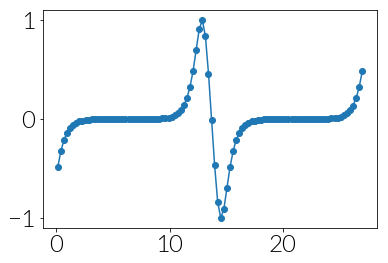

In [8]:
plt.plot(sim.mesh.coordinates[:, 0], sim.spin.reshape(-1, 3)[:, 0], 'o-')

## LLG

In [9]:
sim = fidimag.atomistic.Sim(mesh, name='one_dim', driver='llg')
       
# Define the magnetisation
sim.set_mu_s(mus)

# Add the magnetic interactions
sim.add(fidimag.atomistic.Exchange(J))
sim.add(fidimag.atomistic.Anisotropy(Ku, axis=(0, 0, 1)))
sim.add(fidimag.atomistic.DMI(D, dmi_type='interfacial'))
sim.add(fidimag.atomistic.Zeeman((0, 0, B)))

xs = mesh.coordinates[:, 0]
centre_x = (xs.max() + xs.min()) * 0.5 + xs.min() 
       
def m_initial(r):
    x, y, z = r[0], r[1], r[2]
    if np.abs(x - centre_x) < 2:
        return (0, 0.1, -.9)
    else:
        return (0, 0.1, .9)

# sim.set_m((0.1, 0, 0.9))
sim.set_m(m_initial)

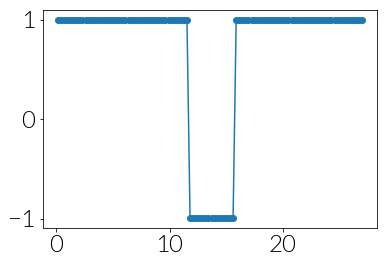

In [10]:
plt.plot(sim.mesh.coordinates[:, 0], sim.spin.reshape(-1, 3)[:, 2], 'o-')

In [11]:
sim.driver.do_precession = False
sim.relax()

#1    t=1e-11    dt=1e-11 max_dmdt=1.77
#2    t=3.53e-10 dt=3.43e-10 max_dmdt=1.77
#3    t=3.79e-09 dt=3.43e-09 max_dmdt=1.77
#4    t=3.81e-08 dt=3.43e-08 max_dmdt=1.77
#5    t=3.81e-07 dt=3.43e-07 max_dmdt=1.77
#6    t=3.81e-06 dt=3.43e-06 max_dmdt=1.77
#7    t=2.51e-05 dt=2.13e-05 max_dmdt=1.77
#8    t=8.19e-05 dt=5.67e-05 max_dmdt=1.77
#9    t=0.000197 dt=0.000115 max_dmdt=1.77
#10   t=0.000417 dt=0.00022 max_dmdt=1.77
#11   t=0.000637 dt=0.00022 max_dmdt=1.77
#12   t=0.000856 dt=0.00022 max_dmdt=1.77
#13   t=0.00108  dt=0.00022 max_dmdt=1.77
#14   t=0.00161  dt=0.000532 max_dmdt=1.78
#15   t=0.00214  dt=0.000532 max_dmdt=1.78
#16   t=0.00267  dt=0.000532 max_dmdt=1.78
#17   t=0.0032   dt=0.000532 max_dmdt=1.78
#18   t=0.00374  dt=0.000532 max_dmdt=1.79
#19   t=0.00483  dt=0.00109 max_dmdt=1.79
#20   t=0.00591  dt=0.00109 max_dmdt=1.8
#21   t=0.007    dt=0.00109 max_dmdt=1.8
#22   t=0.00809  dt=0.00109 max_dmdt=1.81
#23   t=0.00918  dt=0.00109 max_dmdt=1.82
#24   t=0.0109   dt=0.001

#248  t=6.81     dt=0.115 max_dmdt=0.15
#249  t=6.92     dt=0.115 max_dmdt=0.148
#250  t=7.04     dt=0.115 max_dmdt=0.146
#251  t=7.15     dt=0.115 max_dmdt=0.144
#252  t=7.27     dt=0.115 max_dmdt=0.142
#253  t=7.38     dt=0.115 max_dmdt=0.14
#254  t=7.5      dt=0.115 max_dmdt=0.138
#255  t=7.61     dt=0.115 max_dmdt=0.136
#256  t=7.73     dt=0.115 max_dmdt=0.133
#257  t=7.84     dt=0.115 max_dmdt=0.131
#258  t=7.96     dt=0.115 max_dmdt=0.129
#259  t=8.07     dt=0.115 max_dmdt=0.126
#260  t=8.19     dt=0.115 max_dmdt=0.124
#261  t=8.3      dt=0.115 max_dmdt=0.121
#262  t=8.42     dt=0.115 max_dmdt=0.12
#263  t=8.53     dt=0.115 max_dmdt=0.118
#264  t=8.65     dt=0.115 max_dmdt=0.117
#265  t=8.76     dt=0.115 max_dmdt=0.116
#266  t=8.88     dt=0.115 max_dmdt=0.114
#267  t=8.99     dt=0.115 max_dmdt=0.113
#268  t=9.11     dt=0.115 max_dmdt=0.111
#269  t=9.22     dt=0.115 max_dmdt=0.109
#270  t=9.34     dt=0.115 max_dmdt=0.108
#271  t=9.45     dt=0.115 max_dmdt=0.106
#272  t=9.57     dt

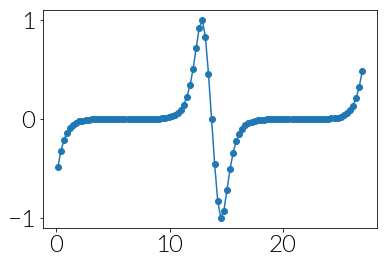

In [12]:
plt.plot(sim.mesh.coordinates[:, 0], sim.spin.reshape(-1, 3)[:, 0], 'o-')

# 2D skyrmion

In [13]:
nx, ny, nz = 15, 15, 1
dx, dy, dz = a, a, az

mesh = fidimag.common.CuboidMesh(nx=nx, ny=ny, nz=nz, dx=dx, dy=dy, dz=dz, 
                                periodicity=(False, False, False),
                                unit_length=1e-9)
xs = mesh.coordinates[:, 0]
ys = mesh.coordinates[:, 1]
centre_x = (xs.max() + xs.min()) * 0.5 + xs.min() 

In [14]:
sim = fidimag.atomistic.Sim(mesh, name='one_dim', driver='llg')
       
# Define the magnetisation
def material(r):
    x, y = r[0] - centre_x, r[1] - centre_x
    
    if x ** 2 + y ** 2 < (np.max(xs) - centre_x) ** 2:
        return mus
    else:
        return 0
    
# sim.set_mu_s(material)
sim.set_mu_s(mus)

# Add the magnetic interactions
sim.add(fidimag.atomistic.Exchange(J))
sim.add(fidimag.atomistic.Anisotropy(Ku, axis=(0, 0, 1)))
sim.add(fidimag.atomistic.DMI(D, dmi_type='interfacial'))
sim.add(fidimag.atomistic.Zeeman((0, 0, B)))
    
def m_initial(r):
    x, y = r[0] - centre_x, r[1] - centre_x
    if x ** 2 + y ** 2 < 1 ** 2:
        return (0, 0, -1)
    else:
        return (0, 0, 1)

# sim.set_m(m_initial)
sim.set_m((0, 0, 1))

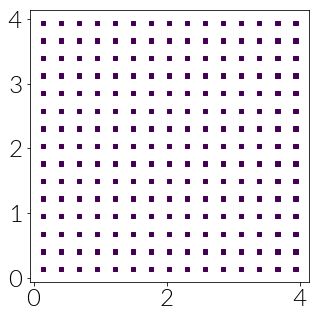

In [15]:
plt.figure(figsize=(5, 5))
plt.scatter(xs, ys, c=sim.spin.reshape(-1, 3)[:, 2], s=20, marker='s')

In [16]:
%%capture
sim.driver.do_precession = False
sim.driver.relax()

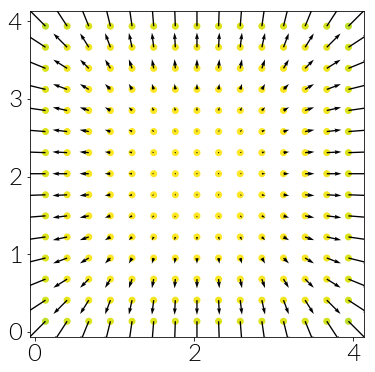

In [17]:
plt.figure(figsize=(6, 6))
plt.scatter(xs, ys, c=sim.spin.reshape(-1, 3)[:, 2], vmin=-1, vmax=1)

plt.quiver(xs, ys, sim.spin.reshape(-1, 3)[:, 0], sim.spin.reshape(-1, 3)[:, 1])

## Steepest Descent

In [18]:
nx, ny, nz = 50, 50, 1
dx, dy, dz = a, a, az

mesh = fidimag.common.CuboidMesh(nx=nx, ny=ny, nz=nz, dx=dx, dy=dy, dz=dz, 
                                periodicity=(False, False, False),
                                unit_length=1e-9)
xs = mesh.coordinates[:, 0]
ys = mesh.coordinates[:, 1]
centre_x = (xs.max() + xs.min()) * 0.5 + xs.min() 

In [19]:
sim = fidimag.atomistic.Sim(mesh, name='two_dim', driver='steepest_descent')
       
# Define the magnetisation
def material(r):
    x, y = r[0] - centre_x, r[1] - centre_x
    
    if x ** 2 + y ** 2 < (np.max(xs) - centre_x) ** 2:
        return mus
    else:
        return 0
    
# sim.set_mu_s(material)
sim.set_mu_s(mus)

# Add the magnetic interactions
sim.add(fidimag.atomistic.Exchange(J))
sim.add(fidimag.atomistic.Anisotropy(Ku, axis=(0, 0, 1)))
sim.add(fidimag.atomistic.DMI(D, dmi_type='interfacial'))
sim.add(fidimag.atomistic.Zeeman((0, 0, B)))
       
def m_initial(r):
    x, y = r[0] - centre_x, r[1] - centre_x
    if x ** 2 + y ** 2 < 1:
        return (0, 0, -1)
    else:
        return (0, 0, 1)

# sim.set_m(m_initial)
sim.set_m((0, 0, 1))

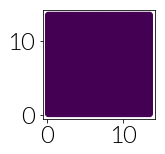

In [20]:
plt.figure(figsize=(2, 2))
plt.scatter(xs, ys, c=sim.spin.reshape(-1, 3)[:, 2])

In [21]:

sim.driver.minimize(max_count=1000, stopping_dm=1e-11)

#max_tau=0.0246   max_dm=0.00127    counter=0
#max_tau=0.0241   max_dm=0.308      counter=1
#max_tau=0.0254   max_dm=0.106      counter=2
#max_tau=0.0133   max_dm=0.0399     counter=3
#max_tau=0.0143   max_dm=0.101      counter=4
#max_tau=0.0142   max_dm=0.055      counter=5
#max_tau=0.351    max_dm=0.148      counter=6
#max_tau=0.0244   max_dm=0.147      counter=7
#max_tau=0.0257   max_dm=0.143      counter=8
#max_tau=0.0383   max_dm=0.087      counter=9
#max_tau=0.0209   max_dm=0.0473     counter=10
#max_tau=0.826    max_dm=0.0904     counter=11
#max_tau=0.0243   max_dm=0.0928     counter=12
#max_tau=0.0502   max_dm=0.0739     counter=13
#max_tau=0.0986   max_dm=0.196      counter=14
#max_tau=0.0978   max_dm=0.237      counter=15
#max_tau=0.0605   max_dm=0.118      counter=16
#max_tau=0.0748   max_dm=0.227      counter=17
#max_tau=0.105    max_dm=0.258      counter=18
#max_tau=0.0164   max_dm=0.412      counter=19
#max_tau=0.0297   max_dm=0.435      counter=20
#max_tau=0.0654   max_d

#max_tau=0.168    max_dm=0.0251     counter=245
#max_tau=5.49     max_dm=0.0279     counter=246
#max_tau=1.48     max_dm=0.147      counter=247
#max_tau=5.51     max_dm=0.147      counter=248
#max_tau=0.271    max_dm=0.124      counter=249
#max_tau=0.814    max_dm=0.123      counter=250
#max_tau=0.343    max_dm=0.0762     counter=251
#max_tau=12.6     max_dm=0.0767     counter=252
#max_tau=0.223    max_dm=0.365      counter=253
#max_tau=1.18     max_dm=0.354      counter=254
#max_tau=0.172    max_dm=0.496      counter=255
#max_tau=9.35     max_dm=0.471      counter=256
#max_tau=0.109    max_dm=0.138      counter=257
#max_tau=0.391    max_dm=0.138      counter=258
#max_tau=0.328    max_dm=0.0306     counter=259
#max_tau=1.35     max_dm=0.0295     counter=260
#max_tau=0.256    max_dm=0.0255     counter=261
#max_tau=3.46     max_dm=0.0256     counter=262
#max_tau=0.136    max_dm=0.0711     counter=263
#max_tau=2.57     max_dm=0.0712     counter=264
#max_tau=0.153    max_dm=0.0275     coun

#max_tau=0.411    max_dm=0.00037    counter=489
#max_tau=3.27     max_dm=0.000197   counter=490
#max_tau=0.137    max_dm=0.00222    counter=491
#max_tau=5.67     max_dm=0.00223    counter=492
#max_tau=0.943    max_dm=0.00376    counter=493
#max_tau=0.455    max_dm=0.00376    counter=494
#max_tau=0.154    max_dm=0.00047    counter=495
#max_tau=2.8      max_dm=0.000449   counter=496
#max_tau=0.213    max_dm=0.00155    counter=497
#max_tau=0.921    max_dm=0.00156    counter=498
#max_tau=0.263    max_dm=0.000373   counter=499
#max_tau=0.93     max_dm=0.000365   counter=500
#max_tau=0.17     max_dm=0.000254   counter=501
#max_tau=3.92     max_dm=0.000249   counter=502
#max_tau=0.0814   max_dm=0.00137    counter=503
#max_tau=0.214    max_dm=0.00137    counter=504
#max_tau=0.686    max_dm=0.000202   counter=505
#max_tau=1.45     max_dm=0.000192   counter=506
#max_tau=0.218    max_dm=0.000757   counter=507
#max_tau=6.27     max_dm=0.000751   counter=508
#max_tau=0.196    max_dm=0.0101     coun

#max_tau=28       max_dm=1.56e-05   counter=724
#max_tau=0.156    max_dm=0.000423   counter=725
#max_tau=1.54     max_dm=0.000423   counter=726
#max_tau=0.552    max_dm=1.49e-05   counter=727
#max_tau=58.4     max_dm=1.82e-05   counter=728
#max_tau=0.149    max_dm=1.84e-05   counter=729
#max_tau=0.693    max_dm=8.7e-06    counter=730
#max_tau=0.243    max_dm=9.77e-06   counter=731
#max_tau=2.1      max_dm=1.38e-05   counter=732
#max_tau=0.156    max_dm=0.000124   counter=733
#max_tau=11.9     max_dm=0.000124   counter=734
#max_tau=0.0761   max_dm=1.15e-05   counter=735
#max_tau=0.818    max_dm=1.14e-05   counter=736
#max_tau=0.262    max_dm=3.18e-05   counter=737
#max_tau=8.93     max_dm=3.23e-05   counter=738
#max_tau=0.119    max_dm=5.17e-05   counter=739
#max_tau=8.7      max_dm=5.18e-05   counter=740
#max_tau=0.302    max_dm=4.04e-05   counter=741
#max_tau=0.859    max_dm=4.04e-05   counter=742
#max_tau=0.0882   max_dm=1.98e-05   counter=743
#max_tau=1.92     max_dm=2e-05      coun

#max_tau=0.152    max_dm=5.12e-07   counter=965
#max_tau=0.717    max_dm=5.47e-07   counter=966
#max_tau=0.215    max_dm=9.86e-07   counter=967
#max_tau=7.73     max_dm=9.72e-07   counter=968
#max_tau=0.258    max_dm=6.25e-06   counter=969
#max_tau=1.59     max_dm=6.24e-06   counter=970
#max_tau=0.406    max_dm=2.69e-07   counter=971
#max_tau=11.4     max_dm=4.7e-07    counter=972
#max_tau=0.0846   max_dm=1.07e-05   counter=973
#max_tau=1.1      max_dm=1.08e-05   counter=974
#max_tau=0.353    max_dm=5.5e-07    counter=975
#max_tau=26.7     max_dm=5.4e-07    counter=976
#max_tau=0.166    max_dm=2.77e-06   counter=977
#max_tau=6.22     max_dm=2.77e-06   counter=978
#max_tau=0.462    max_dm=3.98e-06   counter=979
#max_tau=2.81     max_dm=3.98e-06   counter=980
#max_tau=0.0875   max_dm=7.95e-07   counter=981
#max_tau=7.98     max_dm=7.97e-07   counter=982
#max_tau=0.486    max_dm=1.21e-06   counter=983
#max_tau=1.69     max_dm=1.88e-06   counter=984
#max_tau=0.0936   max_dm=1.86e-06   coun

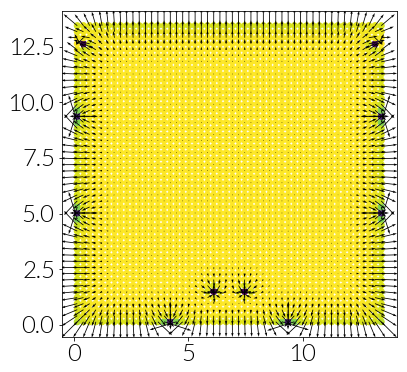

In [22]:
plt.figure(figsize=(6, 6))
plt.scatter(xs, ys, c=sim.spin.reshape(-1, 3)[:, 2], vmin=-1, vmax=1)

plt.quiver(xs, ys, sim.spin.reshape(-1, 3)[:, 0], sim.spin.reshape(-1, 3)[:, 1])

In [23]:
sim.mesh.nx

50

In [24]:
for i in sim.spin.reshape(-1, 3):
    print(i)

[-0.43338238 -0.43314089  0.79029657]
[-0.28636239 -0.43328238  0.85455425]
[-0.18333474 -0.43832847  0.87991848]
[-0.11503138 -0.44495195  0.88813599]
[-0.07071724 -0.451322    0.88955468]
[-0.04187655 -0.45643183  0.88877238]
[-0.02231038 -0.45974495  0.8877707 ]
[-0.00736994 -0.46094383  0.88739871]
[ 0.0069731  -0.45974977  0.88802113]
[ 0.02522423 -0.45579056  0.88972957]
[ 0.05400305 -0.44845764  0.89217118]
[ 0.10513656 -0.43654049  0.8935204 ]
[ 0.20236701 -0.41666397  0.88624981]
[ 0.39523267 -0.37540566  0.83836849]
[ 0.75965839 -0.24532702  0.60227385]
[-0.00408469  0.57184384 -0.82035232]
[-0.75163895 -0.22847194  0.61874022]
[-0.38534744 -0.36068011  0.84936282]
[-0.19272637 -0.39991558  0.89606031]
[-0.09630853 -0.41470043  0.90484707]
[-0.04715753 -0.41955304  0.90650505]
[-0.02263238 -0.41963182  0.90741221]
[-0.01142549 -0.41906224  0.90788562]
[-0.00606312 -0.42090633  0.90708385]
[-0.00200955 -0.42295479  0.90614856]
[ 0.00200955 -0.42295479  0.90614856]
[ 0.00606312

[-2.51174610e-04 -8.86055865e-05  9.99999965e-01]
[-1.54030008e-04 -9.41438412e-05  9.99999984e-01]
[-9.21911980e-05 -1.01891994e-04  9.99999991e-01]
[-5.33586939e-05 -1.10366967e-04  9.99999992e-01]
[-2.95069460e-05 -1.18441784e-04  9.99999993e-01]
[-1.52964480e-05 -1.25252051e-04  9.99999992e-01]
[-7.03515190e-06 -1.30152654e-04  9.99999992e-01]
[-2.00380475e-06 -1.32708424e-04  9.99999991e-01]
[ 2.00380475e-06 -1.32708424e-04  9.99999991e-01]
[ 7.03515190e-06 -1.30152654e-04  9.99999992e-01]
[ 1.52964480e-05 -1.25252051e-04  9.99999992e-01]
[ 2.95069460e-05 -1.18441784e-04  9.99999993e-01]
[ 5.33586939e-05 -1.10366967e-04  9.99999992e-01]
[ 9.21911980e-05 -1.01891994e-04  9.99999991e-01]
[ 1.54030008e-04 -9.41438412e-05  9.99999984e-01]
[ 2.51174610e-04 -8.86055865e-05  9.99999965e-01]
[ 4.02712239e-04 -8.74379651e-05  9.99999915e-01]
[ 6.38332057e-04 -9.40111703e-05  9.99999792e-01]
[ 1.00428372e-03 -1.14009967e-04  9.99999489e-01]
[ 1.57253459e-03 -1.57366809e-04  9.99998751e-01]


[3.95376601e-05 6.21328259e-03 9.99980697e-01]
[6.39960253e-05 6.20826004e-03 9.99980727e-01]
[1.01935474e-04 6.20077830e-03 9.99980770e-01]
[1.61241499e-04 6.18978092e-03 9.99980830e-01]
[2.54168647e-04 6.17375445e-03 9.99980910e-01]
[3.99786626e-04 6.15042346e-03 9.99981006e-01]
[6.27770865e-04 6.11643220e-03 9.99981097e-01]
[9.84223972e-04 6.06670217e-03 9.99981113e-01]
[0.00154061 0.00599335 0.99998085]
[0.00240739 0.00588368 0.99997979]
[0.0037549  0.00571713 0.99997661]
[0.00584486 0.00545888 0.99996802]
[0.00907818 0.00504935 0.99994604]
[0.01406722 0.00438564 0.99989143]
[0.02174562 0.00329153 0.99975812]
[0.03353683 0.00147361 0.9994364 ]
[ 0.05161805 -0.00152865  0.99866573]
[ 0.07934352 -0.0063599   0.99682704]
[ 0.12193513 -0.01372308  0.9924432 ]
[ 0.18757503 -0.02389412  0.98195961]
[ 0.28878691 -0.03566483  0.95672888]
[ 0.44216576 -0.04513889  0.89579681]
[-0.4462432  -0.01057301  0.89484927]
[-0.29098085 -0.0070855   0.95670264]
[-0.18832927 -0.00276364  0.98210206]
[-